## Статистическое исследование развития научной сферы на основе данных Федеральных статистических наблюдений Росстата


#### Актуальность
Разветие научной сферы является одним из ключевых направлений для любой страны, так как влияние технологий на произодство товаров и добычу ресурсов растет с каждым днем. Увеличение научного потециала способствует ускорению темпов производство и оптимизации расходов ресурсов. Поэтому наличие высококвалифицированных кадров, благоприятной среды для их формирования и продуктивной работы вносит большой вклад в улучшение благосостояния каждого граждана.

#### Описание исследования
Для проведения этого исследования были взяты такие данные как финансирование науки из средств федерального бюджета, кол-во исследователей и организаций, выполнявших научные исследования и разработки. Цель исследования состоит в том, чтобы выяснить эффективность финансирования науки и зависимость кол-ва организаций от кол-ва исследователей.

#### Аналогичные подходы

В качестве примера проведения подобных статистических исследований можно привести работу Миндели Л.Э. и Черных С.И. из Института проблем развития науки РАН (https://federalizm.rea.ru/jour/article/view/359). В их работе перечисляются стандартные методы оценки эффективности финансирования науки, где в качестве проксипеременной предлагается брать общее число статей, опубликованных в рецензируемых журналах, число статей приходящих на одного исследователя, средний импакт-фактор (численный показатель важности) журналов, в которых опубликованы статьи и другие. В нашем же исследовании предлагается более примитивный подход, оценить эффективность с помощью абсолютного значения кол-ва исследователей и организаций, проводящих научные исследования.

#### Описание данных

Все данные были взяты из архива Росстата за промежуток с 2015 г. по 2023 г. включительно (всего 9 лет).

In [48]:
# ипмортирование нужных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [22]:
# импортирование данных
data = np.array([[4175, 4032, 3944, 3950, 4051, 4175, 4175, 4195, 4125], 
                 [379411, 370379, 359793, 347854, 348221, 346497, 340142, 340666, 338900], 
                 [439392.8, 402722.3, 377882.2, 420472.3, 489158.4, 549602.2, 626574.3, 631701.6, 691758.9]]).transpose()
df = pd.DataFrame(data, index=np.arange(2015, 2024), columns=['organizations', 'researchers', 'financing'])
df['organizations'] = df['organizations'].astype('int64')
df['researchers'] = df['researchers'].astype('int64')
df

,organizations,researchers,financing
2015,4175,379411,439392.8
2016,4032,370379,402722.3
2017,3944,359793,377882.2
2018,3950,347854,420472.3
2019,4051,348221,489158.4
2020,4175,346497,549602.2
2021,4175,340142,626574.3
2022,4195,340666,631701.6
2023,4125,338900,691758.9


#### Описание данных

1) Переменная `organizations` показывает кол-во организаций, выполнявших научные исследования и разработки за указанный промежуток времени, переменная является количественной и дискретной. 
Ссылка на дынные: https://docs.google.com/spreadsheets/d/1NO7jEHLwio5ZDJ3KgU0yWvO__AJ6xuW7/edit?usp=drive_link&ouid=103424444688334866811&rtpof=true&sd=true
График переменной:

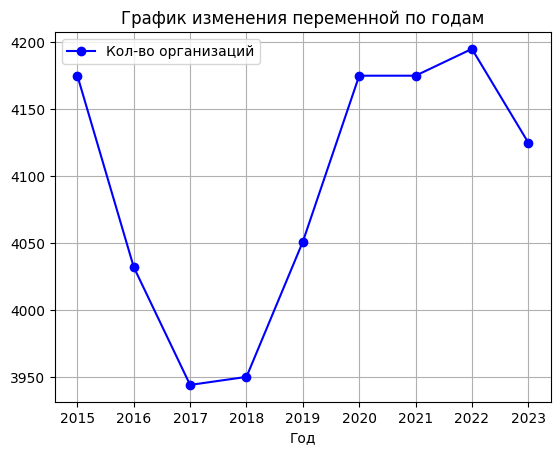

In [30]:
plt.plot(np.arange(2015, 2024), df['organizations'], marker='o', color='b', linestyle='-', label='Кол-во организаций')
plt.xlabel('Год')
plt.title('График изменения переменной по годам')
plt.grid(True)
plt.legend()
plt.show()

По графику можно понять, что в после 2015 года кол-во организаций сократилось до уровня чуть ниже 3950 организаций на 2 года, потом этот показатель вернулся на прежний уровень. Перенная является достаточно стабильной, поэтому выбросов не наблюдается. Размах вариации: 4195 - 3944 = 251

2) Переменная `researchers` показывает численность исследователей за указанный промежуток времени, переменная является количественной и дискретной. Ссылка на данные: https://docs.google.com/spreadsheets/d/1Mn9MsNZsHkF5m9dlf5DdZnaVDAZkUyjO/edit?usp=drive_link&ouid=103424444688334866811&rtpof=true&sd=true
График переменной:

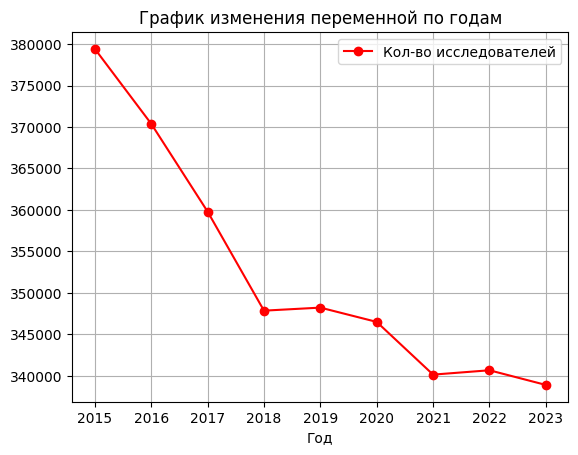

In [32]:
plt.plot(np.arange(2015, 2024), df['researchers'], marker='o', color='r', linestyle='-', label='Кол-во исследователей')
plt.xlabel('Год')
plt.title('График изменения переменной по годам')
plt.grid(True)
plt.legend()
plt.show()

По графику можно понять, что это переменная имеет нисходящий тренд вниз и с каждым годом кол-во исследователей падает, в пике численность исследователей составляла 379411 человек. Размах вариации: 379411 - 338900 = 40511

3) Переменная `financing` показывает какое количество миллионов рублей было проинвестировано в науку из средств федерального бюджета за указанный промежуток времени, переменная является количественной и непрерывной. Ссылка на данные: https://docs.google.com/spreadsheets/d/1dLZ26miSQcah1B5GsA3iXgGYm4hUiBUG/edit?usp=drive_link&ouid=103424444688334866811&rtpof=true&sd=true
График переменной:

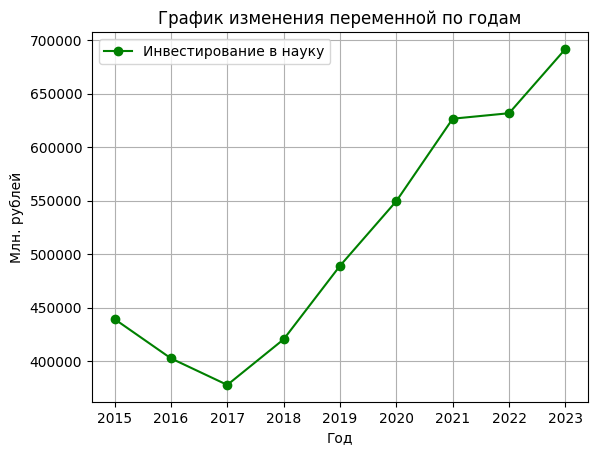

In [36]:
plt.plot(np.arange(2015, 2024), df['financing'], marker='o', color='g', linestyle='-', label='Инвестирование в науку')
plt.xlabel('Год')
plt.ylabel('Млн. рублей')
plt.title('График изменения переменной по годам')
plt.grid(True)
plt.legend()
plt.show()

По графику видно, что с 2015 года по 2017 год включительно объемы финансирования в науку снижались, однако после 2017 года наблюдается монотонный рост объемов финансирования. Размах вариации: 691758,9 - 377882,2 = 313876,7

### Характеристика динамики статистического показателя

В качестве статистического показателя можно взять следующее: финансирование/кол-во исследователей (f/r). Эта переменная будет показывать сколько денежных средств приходится на одного научного исследователя. График новой переменной `f/r`:

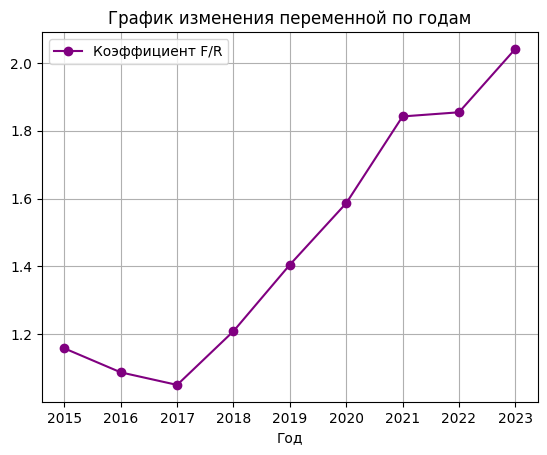

In [40]:
df['f/r'] = df['financing']/df['researchers']
plt.plot(np.arange(2015, 2024), df['f/r'], marker='o', color='purple', linestyle='-', label='Коэффициент F/R')
plt.xlabel('Год')
plt.title('График изменения переменной по годам')
plt.grid(True)
plt.legend()
plt.show()

Как можно увидеть по графику новой переменной, с каждым годом на одного исследователя приходит больше денежных средств. С одной стороны это показывает в некоторой мере эффективность инвестирования, однако не стоит забывать выводы сделанные в предварительном анализе переменных, где за указанный промежуток времени абсолютное кол-во исследователей падало. С одной точки зрения это может указывать на оптимизацию расходов, и теперь деньги "идут в нужные руки", а с другой стороны, уменьшение абсолютного кол-ва исследователей снижает общий научный потенциал страны. Рассмотрим график темпа прироста: 

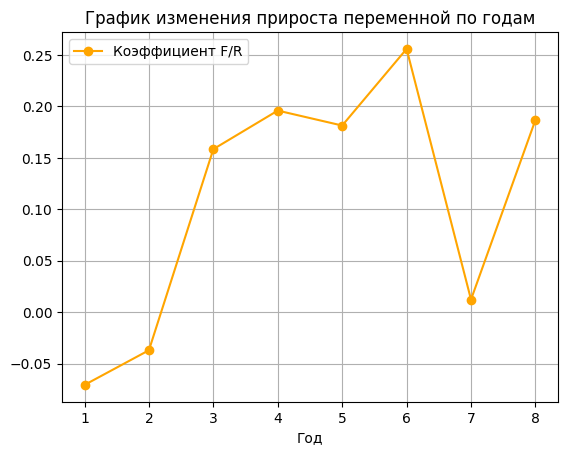

In [41]:
df['f/r'] = df['financing']/df['researchers']
plt.plot(np.arange(1, 9), np.diff(df['f/r']), marker='o', color='orange', linestyle='-', label='Коэффициент F/R')
plt.xlabel('Год')
plt.title('График изменения прироста переменной по годам')
plt.grid(True)
plt.legend()
plt.show()

Как и следовало предположить из предыдущего графика, исходя из линейности тренда исследуемого нами показателя, темпы прироста практически постоянны и имеют положительный характер.

### Выбор измеримого признака, который может оказывать наибольшее влияние на поведение показателя

Дальнейшим шагом нашего исследования будет проверка гипотезы, зависит ли построенный нами показатель эффективности финансирования науки от кол-во организаций, проводящих научные исследования. Для этого можно рассчитать коэффициент корееляции по построить линейную регрессию вида: `f/r = const + beta ⋅ organizations`

In [64]:
model = LinearRegression()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df['organizations'].to_numpy().reshape(-1, 1))
y_scaled = scaler.fit_transform(df['f/r'].to_numpy().reshape(-1, 1))
model.fit(x_scaled, y_scaled)
print(f'Коэффициент наклона (slope): {model.coef_[0][0]}')
print(f'Свободный Член (intercept): {model.intercept_[0]}')


Коэффициент наклона (slope): 0.6629230117438498
Свободный Член (intercept): 1.338715360755198e-15


Как можно увидеть после стандартизации данных коэффициент наклона стал равен 0.663, что является умереной величиной, а также свободный член практически не отличим от нуля. Так как данные стандартизировались, то и коэффициент корреляции равен коэффициенту наклона. Полученный результат можно проинтерпритировать следующим образом: при росте кол-ва организаций, занимающимися научными исследованиями, эффективность финансирования науки тоже будет рости, что звучит довольно логично.

### Выводы по результатам анализа

Результаты, полученные в нашем исследовании, приводят к выводу, что финансирование науки в России проходит эффективно, так как полученный нами показатель эффективности с 2017 года имеет положительный тренд. Также мы выявили положительную зависимость кол-ва учереждений, проводимых научные исследования, от эффективности инвестирования. Однако стоит еще раз отметить упомянутый нами факт, что эффективность финансирования растет не только из-за увеличения объема денежных средств, но и из-за уменьшения кол-ва исследователей, что может быть достаточно сомнительным так как рост кол-ва ученых способствует увеличению эффективности направления. Мы предположили, что, возможно, из-за большей концетрации денежных средств у меньшего числа исследователей только нужные проекты и исследования получают должное финансирование, а значит более эффективно расходуются денежные средства. Также стоит упомянуть в примитивности нашего исследования и, очевидно, мы могли не учесть много факторов, которые оказывают большое воздействие на исследуемый параметр. 